In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

In [112]:
df = pd.read_csv('mushrooms.csv')

In [113]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [115]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## DATA CLEANING____________________________________________________________________________________________________________

In [116]:
# After manually looking throug the code, I noticed that the column 'veil-type' only has the value 'p' so we will drop it.
# I also noticed that the column 'stalk-root' has a lot of missing values replaced with a '?', let's take a closer look.

In [117]:
# We will look at the stalk root column to see if there are any missing values.
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [118]:
# Let's take a look at what percent of the data is missing in the 'stalk-root' column.
missing_values = df['stalk-root'].value_counts()['?']
total_values = df['stalk-root'].count()
percent_missing = missing_values / total_values * 100   
print(percent_missing)

30.526834071885773


In [119]:
# 30% of the data in the 'stalk-root' column is missing. We will drop this column as well and save our cleaned dataset as mushrooms_cleaned.csv
df = df.drop(columns=['stalk-root', 'veil-type'])

df.to_csv('Mushrooms_C.csv', index=False)

## EXPLORATORY DATA ANALYSIS________________________________________________________________________________________________

In [120]:
# Step 1: Load the cleaned data (with original categorical values)
dfc = pd.read_csv("Mushrooms_C.csv")

# Step 2: Label encode the 'Class' column
label_encoder = LabelEncoder()
dfc['class'] = label_encoder.fit_transform(dfc['class'])

# Step 3: One-hot encode all other categorical columns
# Create a DataFrame with all features except 'Class'
features = dfc.drop('class', axis=1)

# Initialize the one-hot encoder from category_encoders for all feature columns
oh_encoder = ce.OneHotEncoder(cols=features.columns)
features_encoded = oh_encoder.fit_transform(features)

# Step 4: Combine the encoded features with the label encoded 'Class' column
dfe = pd.concat([features_encoded, dfc['class']], axis=1)



In [121]:
dfe.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-surface_1,cap-surface_2,cap-surface_3,cap-surface_4,...,population_5,population_6,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7,class
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


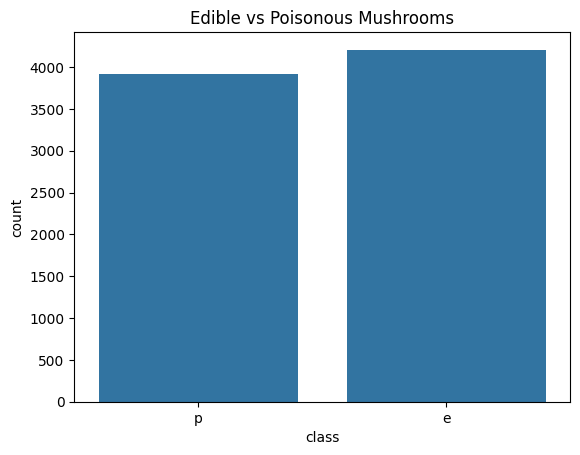

In [122]:
# Let's start by visualizing how many of our mushrooms are edible and how many are poisonous.
sns.countplot(x='class', data=df)  # 0 = edible, 1 = poisonous
plt.title('Edible vs Poisonous Mushrooms')  # Add a title to the plot
plt.show()

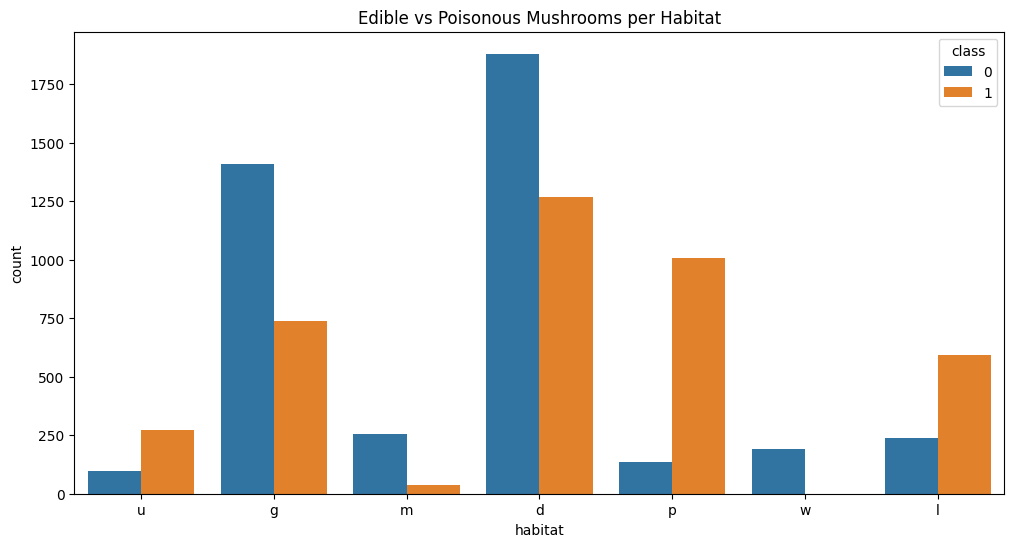

In [123]:
# Histogram of poisonous and edible mushrooms per habitat
plt.figure(figsize=(12, 6))
sns.countplot(x='habitat', hue='class', data=dfc)
plt.title('Edible vs Poisonous Mushrooms per Habitat')  # Add a title to the plot
plt.show()

## BUILDING THE MODELS______________________________________________________________________________________________________

In [124]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 112 entries, cap-shape_1 to class
dtypes: int64(112)
memory usage: 6.9 MB


In [125]:
# We beging by splitting the data into target and predictor variables
# The target variable is 'class' and the predictor variables are all other columns
# We will drop the 'class' column from the dataset and leave only predictor variables
X = dfe.drop('class', axis=1)
# Now we create the target variable
y = dfe['class']

# Next, we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
dfe.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-shape_6,cap-surface_1,cap-surface_2,cap-surface_3,cap-surface_4,...,population_5,population_6,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,habitat_7,class
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## i. RANDOM FOREST______________________________________________________________________________________________________

In [127]:
# Next, we create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [128]:
rf_y_pred = rf.predict(X_test)

In [129]:
# Next up we calculate the accuracy of the model
accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [130]:
# Next, we calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[843   0]
 [  0 782]]


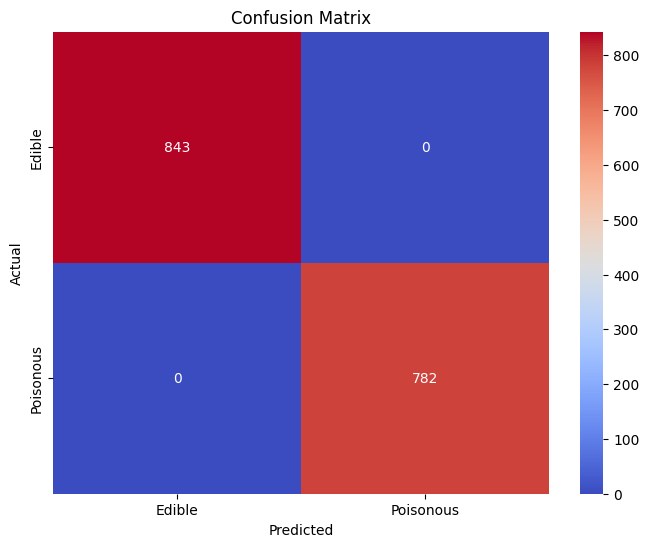

In [131]:
#Next up we vusualize the confusion matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [132]:
# Next, we calculate the classification report
class_report = classification_report(y_test, rf_y_pred) 
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [133]:
# Cross validation and CV score
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.84246154 1.         1.         1.         0.81219212]
Mean CV score: 0.930930731337628


In [134]:
# Next, we calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, rf_y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 1.0


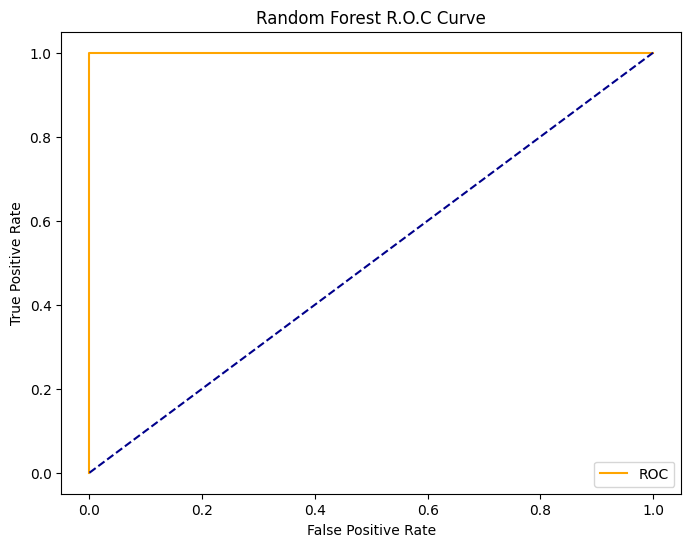

In [135]:
# Next, we calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.title('Random Forest R.O.C Curve')
plt.legend()
plt.show()


## ii. DECISION TREE______________________________________________________________________________________________________

In [136]:
# Now let's move on to the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)


In [137]:
# Next up we calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'DT Accuracy: {dt_accuracy}')

DT Accuracy: 1.0


In [138]:
 # Next, we calculate the confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
print(f'DT Confusion Matrix:\n{dt_conf_matrix}')

DT Confusion Matrix:
[[843   0]
 [  0 782]]


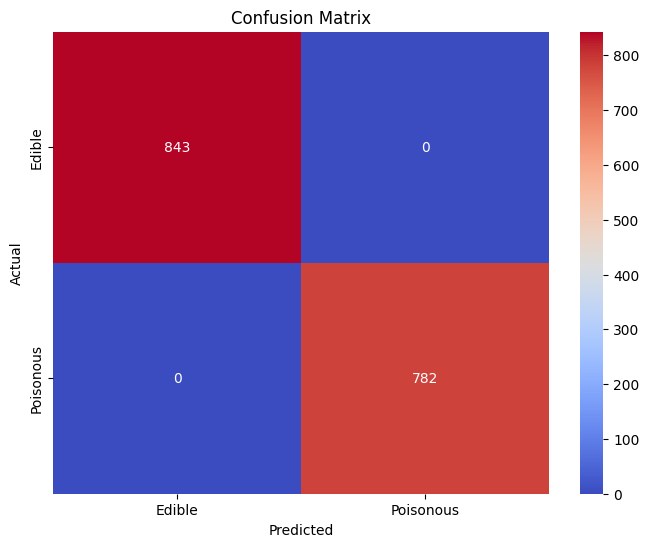

In [139]:
#Next up we vusualize the confusion matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [140]:
# Next, we calculate the classification report
dt_class_report = classification_report(y_test, dt_y_pred) 
print(f'Classification Report:\n{dt_class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [141]:
# Cross validation and CV score
dt_cv_scores = cross_val_score(dt, X, y, cv=5)
print("Cross-validation scores:", dt_cv_scores)
print("Mean CV score:", dt_cv_scores.mean())

Cross-validation scores: [1.         1.         0.99630769 1.         0.83497537]
Mean CV score: 0.966256612353164


In [142]:
# Next, we calculate the ROC AUC score
dt_roc_auc = roc_auc_score(y_test, dt_y_pred)
print(f'ROC AUC Score: {dt_roc_auc}')

ROC AUC Score: 1.0


## iii. GRADIENT BOOSTING______________________________________________________________________________________________________

In [143]:
# And finally, we move on to the gradient boosting classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [144]:
gb_y_pred = gb.predict(X_test)

In [145]:
# Testing the accuracy of Gradient Boosting the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f'GB Accuracy: {gb_accuracy}')

GB Accuracy: 1.0


In [146]:
# Next, we calculate the GB confusion matrix
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
print(f'GB Confusion Matrix:\n{gb_conf_matrix}')

GB Confusion Matrix:
[[843   0]
 [  0 782]]


In [147]:
# Now for the GB classification report
gb_class_report = classification_report(y_test, gb_y_pred)
print(f'GB Classification Report:\n{gb_class_report}')

GB Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [148]:
# GB cross validation and CV score
gb_cv_scores = cross_val_score(gb, X, y, cv=5)
print("GB Cross-validation scores:", gb_cv_scores)
print("GB Mean CV score:", gb_cv_scores.mean())

GB Cross-validation scores: [1.         1.         1.         1.         0.75369458]
GB Mean CV score: 0.9507389162561577


In [149]:
# Next, we calculate the ROC AUC score
gb_roc_auc = roc_auc_score(y_test, gb_y_pred)  
print(f'GB ROC AUC Score: {gb_roc_auc}')

GB ROC AUC Score: 1.0


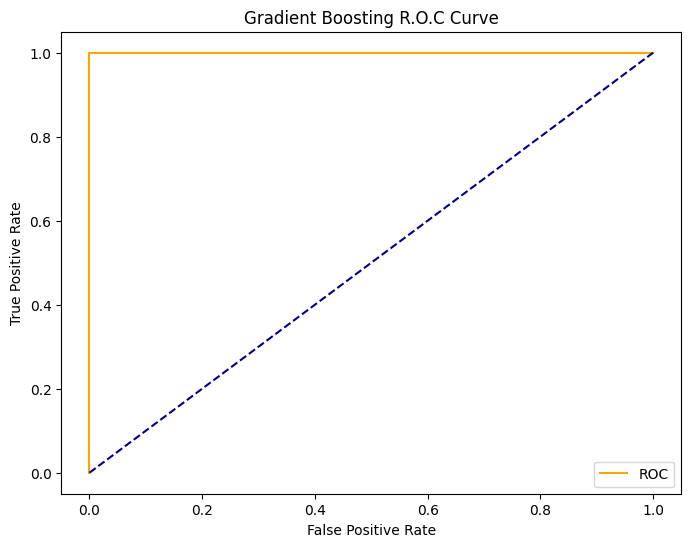

In [150]:
# Next, we calculate the GB ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting R.O.C Curve')
plt.legend()
plt.show()

## GAINING INSIGHTS FROM OUR DATA______________________________________________________________________________________________________

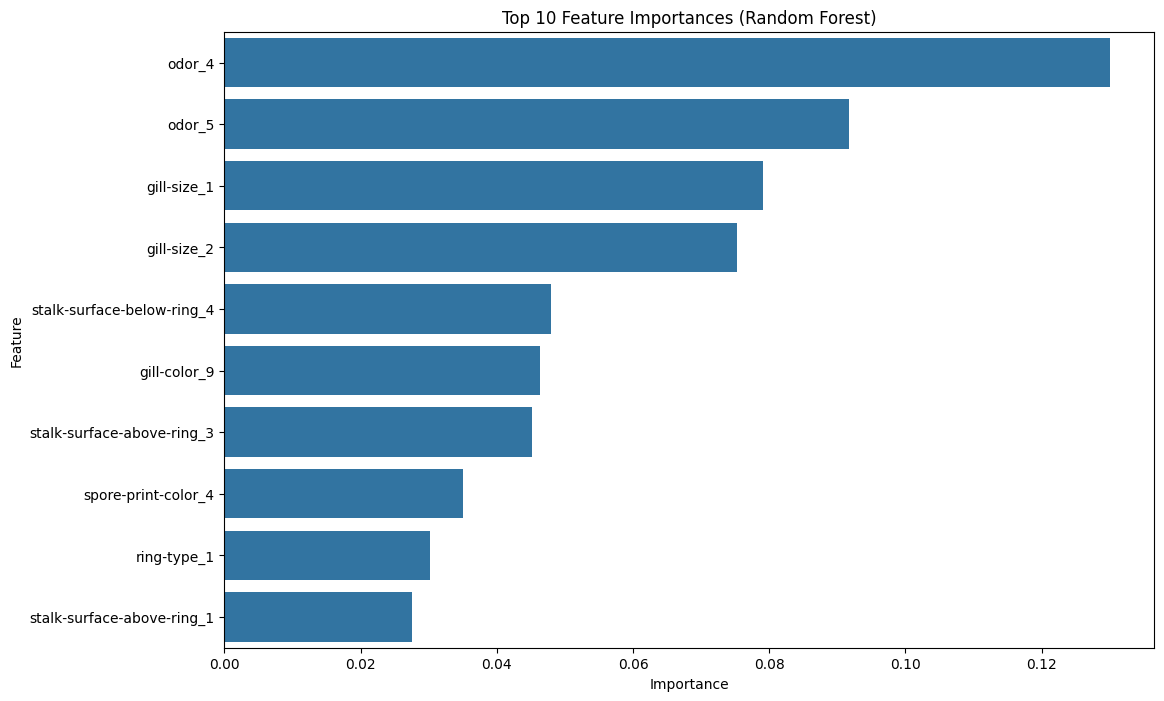

In [151]:
# Let's start by looking at the most important features in the Random Forest model.
rf_importance = rf.feature_importances_
rf_feature_names = X_train.columns

# Create a DataFrame for better visualization
rf_fi = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importance})
rf_fi = rf_fi.sort_values(by='Importance', ascending=False)

# That's too many, let's only look at the top 20 features
rf_top = 10
rf_top_features = rf_fi.head(rf_top)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_top_features)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

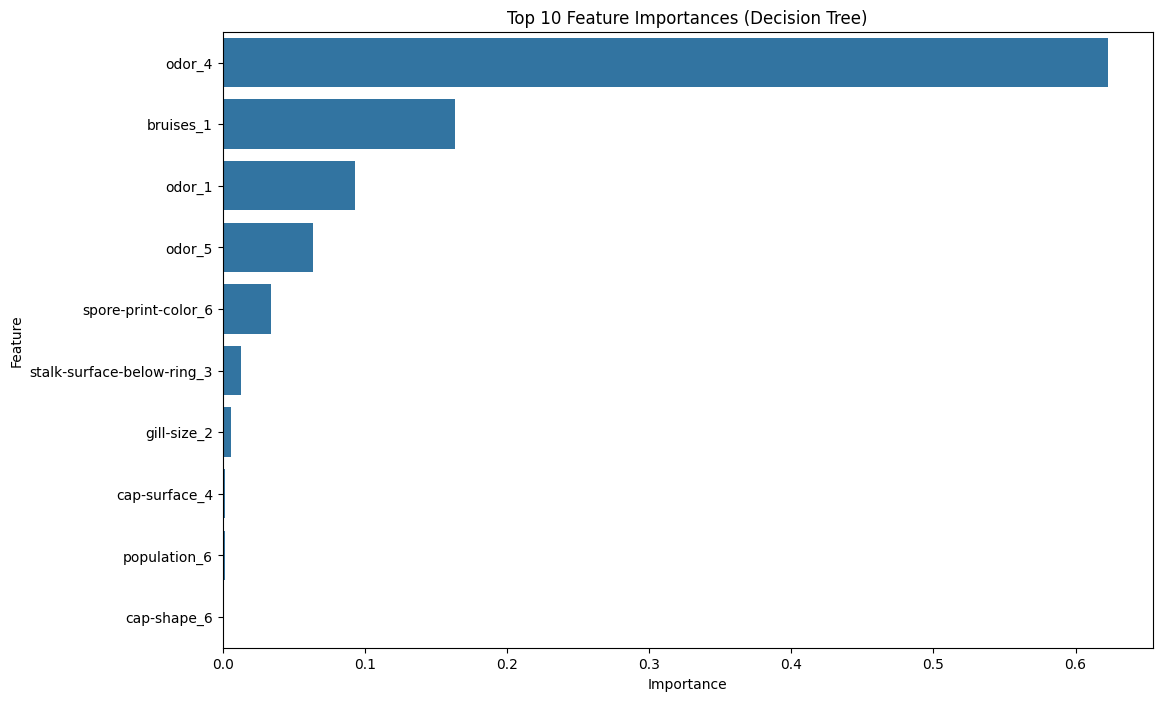

In [152]:
# Next, we will look at the most important features in the Decision Tree  model.
dt_importance = dt.feature_importances_
dt_feature_names = X_train.columns

# Create a DataFrame for better visualization
dt_fi = pd.DataFrame({'Feature': dt_feature_names, 'Importance': dt_importance})
dt_fi = dt_fi.sort_values(by='Importance', ascending=False)


dt_top = 10
dt_top_features = dt_fi.head(dt_top)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_top_features)
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.show()

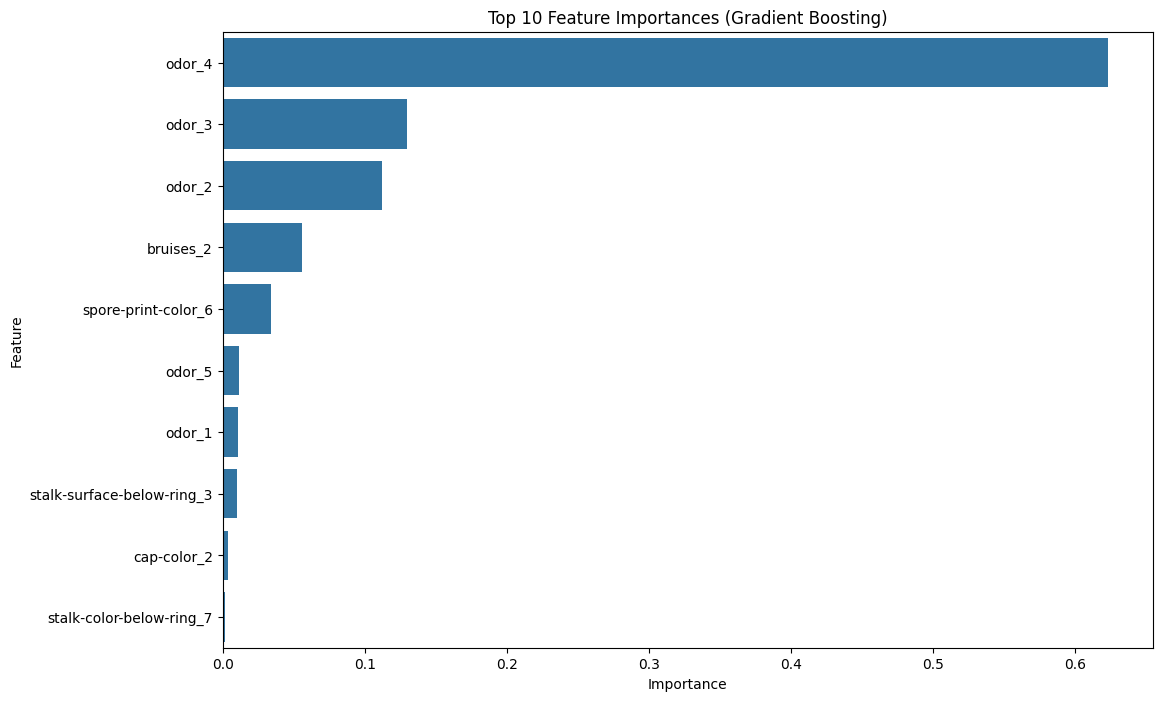

In [153]:
# Next, we will look at the most important features in the Gradient Boosting model.
gb_importance = gb.feature_importances_
gb_feature_names = X_train.columns

# Create a DataFrame for better visualization
gb_fi = pd.DataFrame({'Feature': gb_feature_names, 'Importance': gb_importance})
gb_fi = gb_fi.sort_values(by='Importance', ascending=False)


gb_top = 10
gb_top_features = gb_fi.head(gb_top)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=gb_top_features)
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.show()

In [154]:
#Looking at our dataset, Odor_4, Odor_5 and stalk-surface-below-ring_3 appear in all 3 datasets.

In [155]:
# Let's make a .csv of our encoded data so we can find the encoded columns and compare it to our original so  that we can find what 
dfe.to_csv('Mushrooms_EN.csv', index=False)

In [156]:
# After looking through this we can tell that:


# Odor_4(n) - none
# odor_5(f) - foul
# stalk-surface-below-ring_3(k) - Silky

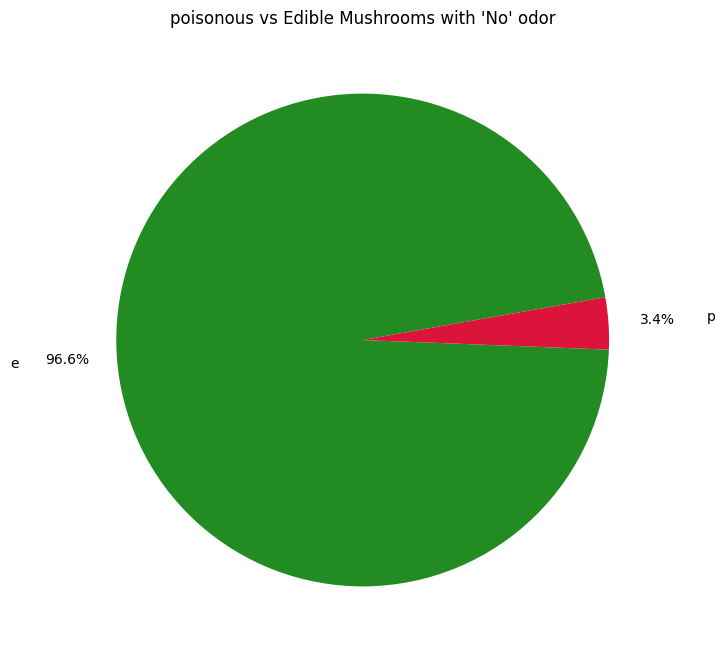

In [157]:
# Let's take a look at how many of odorless mushrooms are poisonous
# Filter the clean dataset for mushrooms with odor 'n'
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'n']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("poisonous vs Edible Mushrooms with 'No' odor")
plt.show()

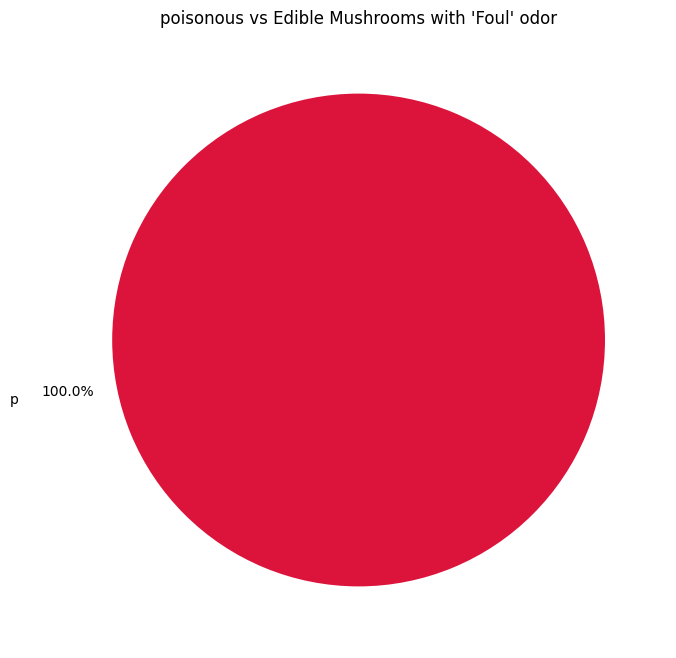

In [158]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'f']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("poisonous vs Edible Mushrooms with 'Foul' odor")
plt.show()

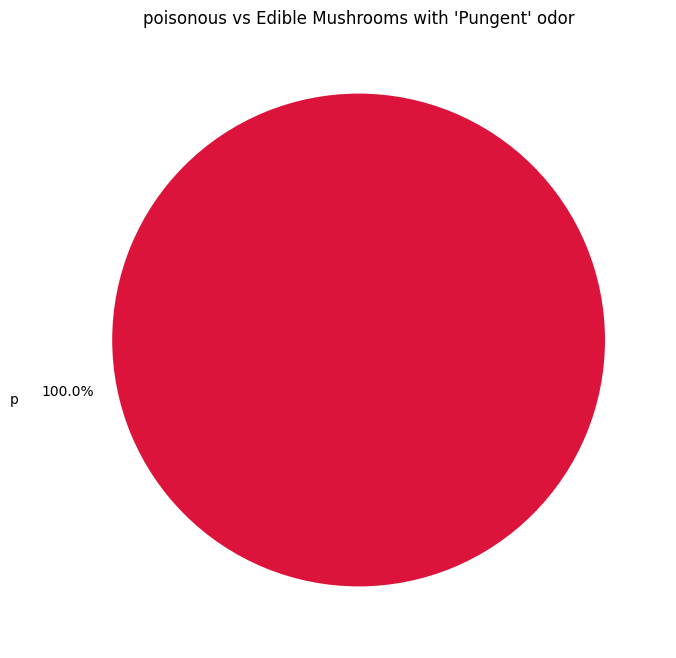

In [159]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'p']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("poisonous vs Edible Mushrooms with 'Pungent' odor")
plt.show()

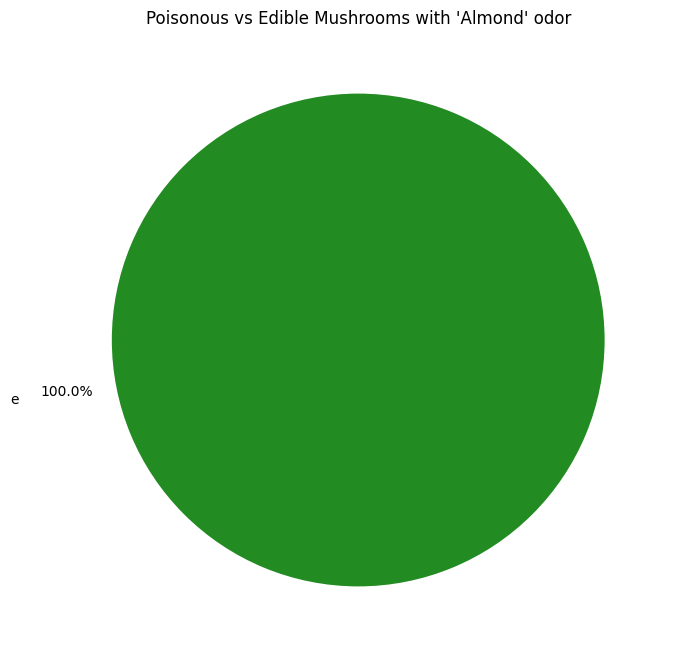

In [160]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'a']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with 'Almond' odor")
plt.show()

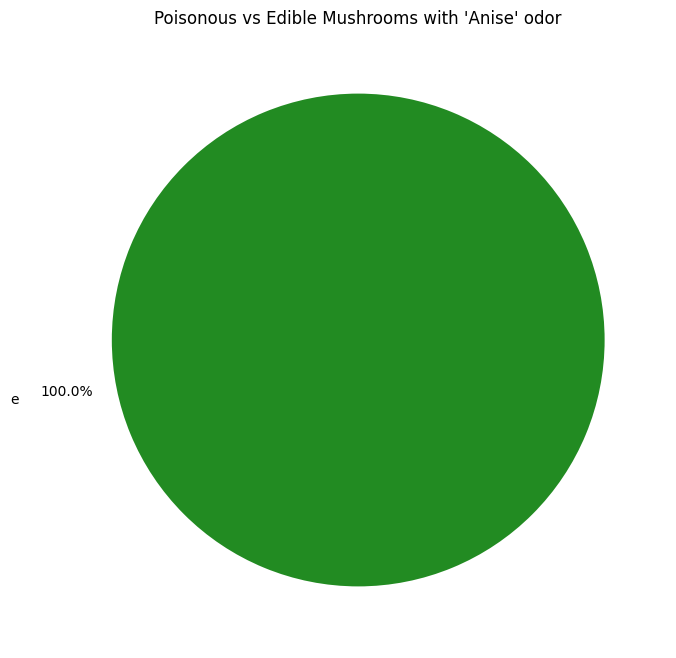

In [161]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'l']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with 'Anise' odor")
plt.show()

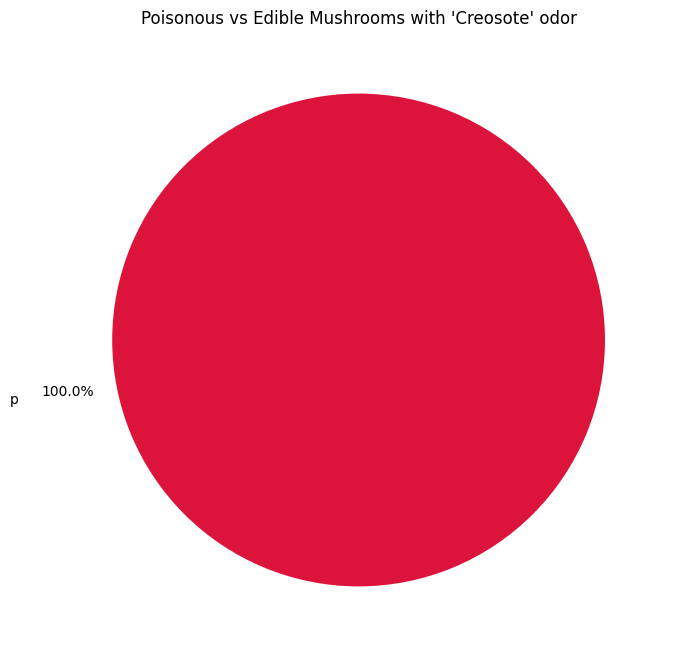

In [162]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'c']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with 'Creosote' odor")
plt.show()

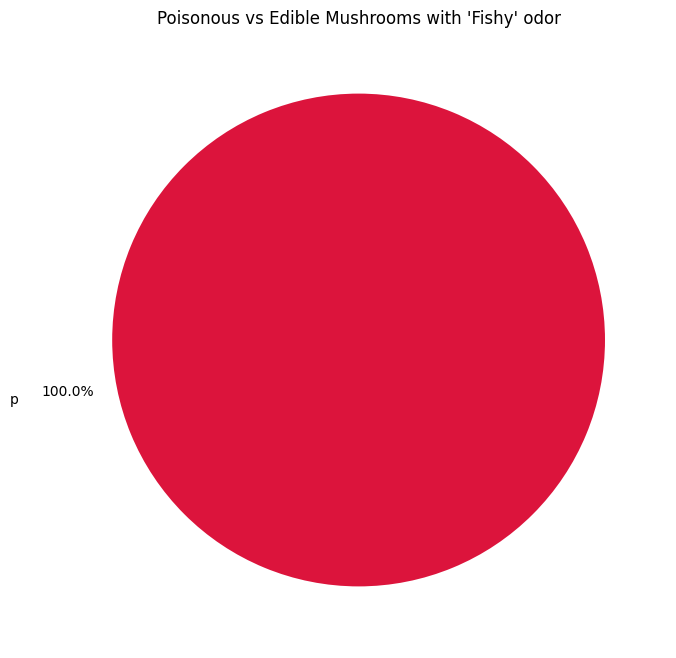

In [163]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'y']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with 'Fishy' odor")
plt.show()

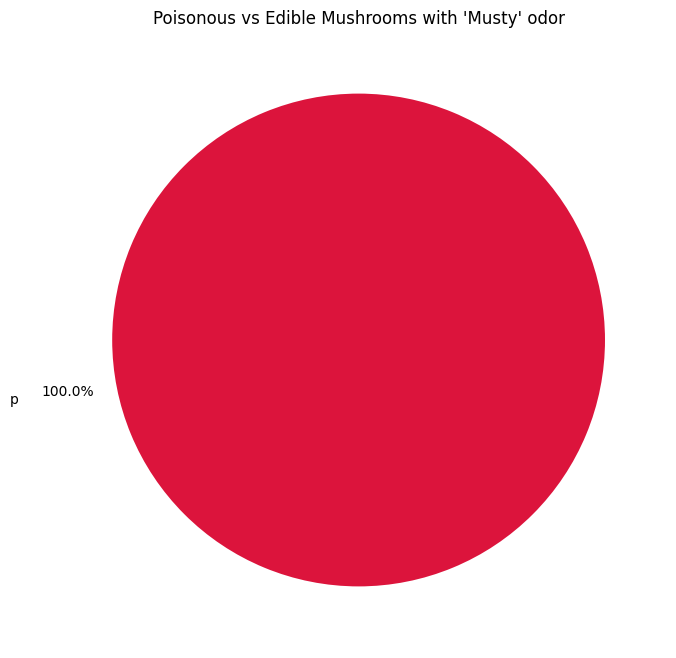

In [164]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 'm']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with 'Musty' odor")
plt.show()

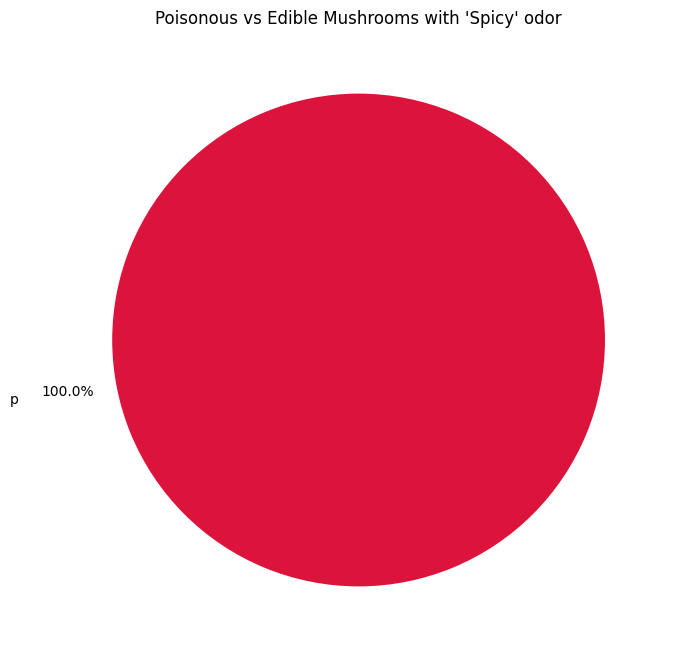

In [165]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
odor_f = df[df['odor'] == 's']
class_counts_f = odor_f['class'].value_counts()

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with 'Spicy' odor")
plt.show()

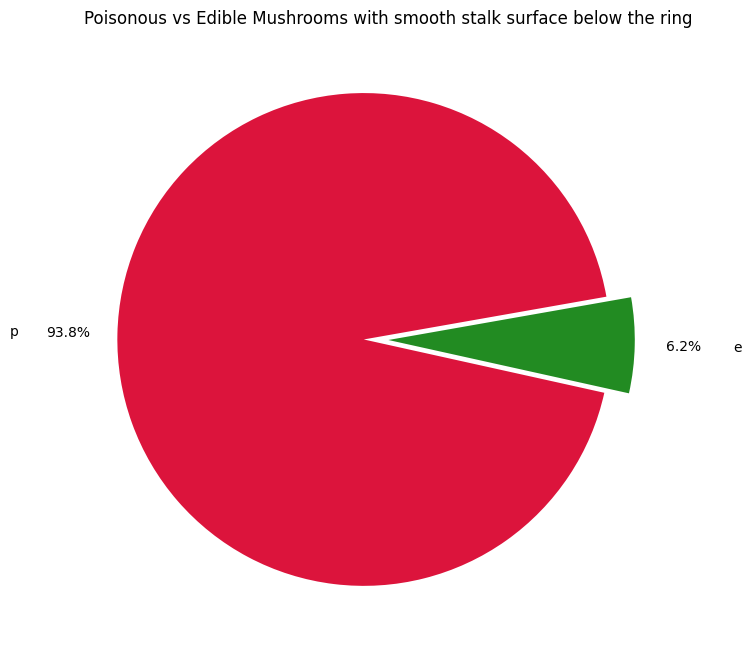

In [166]:
stalk_k = df[df['stalk-surface-below-ring'] == 'k']

# Count the number of poisonous vs edible mushrooms.
# (Assuming your 'class' column in dfc has the original labels, e.g., 'p' for poisonous and 'e' for edible.)
a_class_counts = stalk_k['class'].value_counts()
colors = ['crimson', 'ForestGreen']
explode = (0.1, 0) 

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(a_class_counts, labels=a_class_counts.index, colors=colors, autopct='%1.1f%%', startangle=10, explode=explode, pctdistance=1.2, labeldistance=1.4)
plt.title("Poisonous vs Edible Mushrooms with smooth stalk surface below the ring")
plt.show()

In [167]:
dfc['stalk-surface-below-ring'].value_counts()

stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64

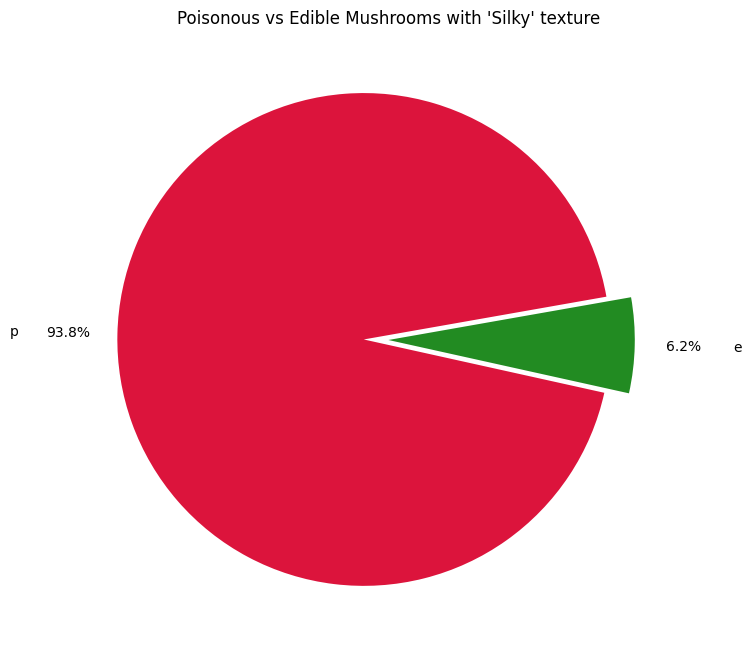

In [168]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
Texture = df[df['stalk-surface-below-ring'] == 'k']
class_counts_f = Texture['class'].value_counts()
explode = (0.1, 0)

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4, explode=explode)
plt.title("Poisonous vs Edible Mushrooms with 'Silky' texture")
plt.show()

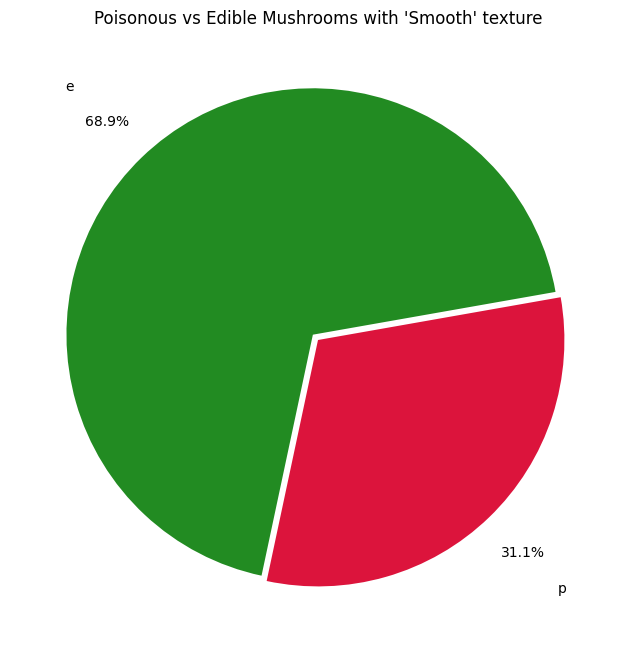

In [169]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
Texture = df[df['stalk-surface-below-ring'] == 's']
class_counts_f = Texture['class'].value_counts()
explode = (0.03, 0)

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4, explode=explode)
plt.title("Poisonous vs Edible Mushrooms with 'Smooth' texture")
plt.show()

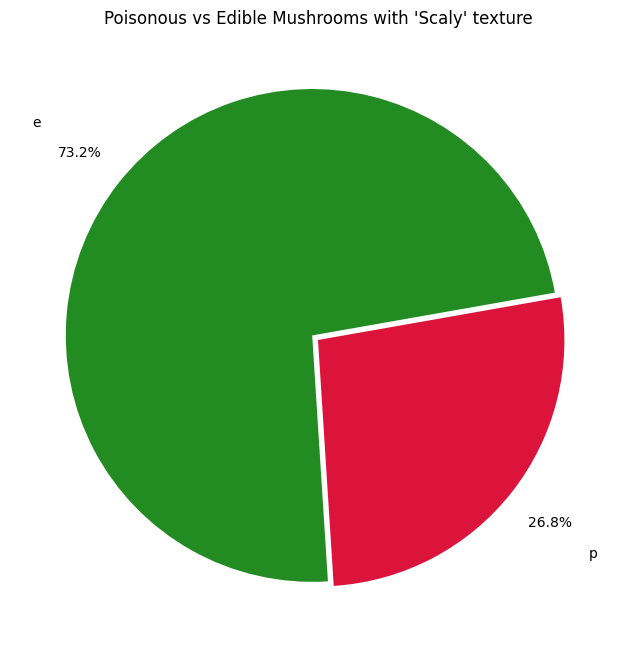

In [170]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
Texture = df[df['stalk-surface-below-ring'] == 'y']
class_counts_f = Texture['class'].value_counts()
explode = (0.03, 0)

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4, explode=explode)
plt.title("Poisonous vs Edible Mushrooms with 'Scaly' texture")
plt.show()

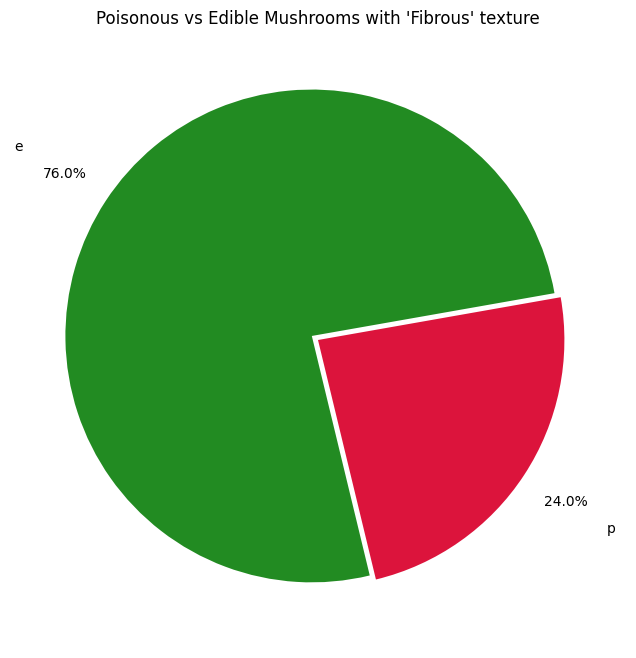

In [171]:
class_color = {'p': 'crimson', 'e': 'ForestGreen'}

# For odor 'f' chart:
Texture = df[df['stalk-surface-below-ring'] == 'f']
class_counts_f = Texture['class'].value_counts()
explode = (0.03, 0)

# Generate the colors for this chart based on the fixed mapping.
slice_colors_f = [class_color[label] for label in class_counts_f.index]

plt.figure(figsize=(8, 8))
plt.pie(class_counts_f, labels=class_counts_f.index, colors=slice_colors_f,
        autopct='%1.1f%%', startangle=10, pctdistance=1.2, labeldistance=1.4, explode=explode)
plt.title("Poisonous vs Edible Mushrooms with 'Fibrous' texture")
plt.show()

## CONCLUSION______________________________________________________________________________________________________

In [ ]:
# Odor is a reliable indicator for poisonous and edible mushrooms in the Agaricus and Lepiota Families. 

# Mushroom in these families that either smell like Almonds(a type of nut) or Anise(a sweet smell like licorice) are safe to eat.

# Most odorless mushrooms are safe to eat, however, if it has a silky texture (smooth, soft, and shiny) it is not safe to eat.

# Texture is also an indicator of edibility however it is not as reliable as smell, the smoother the mushroom the higher the chance it is poisonous.

 # I need volunteers to test this hypothesis.
